# Alternative Hypothesis: Minimum Wage does not increase in proportion to an increase in GDP

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plot

### Function to return data for individual country

In [2]:
# Simple function to return data for corresponding country in a Database
def get_country_data(data_frame, country: str):
    return data_frame[data_frame['Country Code'] == country]

## Importing first data set - GDP from OECD

Original Data source: https://data.oecd.org/gdp/gross-domestic-product-gdp.htm

In [3]:
gdp_df = pd.read_csv("datasets/GDP_Selected_2000_2020_OECD.csv")
gdp_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,USD_CAP,A,2000,28252.629885,NaN
1,AUS,GDP,TOT,USD_CAP,A,2001,29493.214856,NaN
2,AUS,GDP,TOT,USD_CAP,A,2002,30740.962903,NaN
3,AUS,GDP,TOT,USD_CAP,A,2003,32248.255835,NaN
4,AUS,GDP,TOT,USD_CAP,A,2004,33865.906508,NaN


As can be seen above a number of extra rows are avaliable. However, frequency, measure, subject, indicator and flag codes all remained constant throughout due to the selection criteria used when downloading the data from the OECD website. Therefore, these columsn could be safely dropped. Lastly, all values were divided by one thousand and columns were more appropriately named.

In [4]:
gdp_df.drop(columns = ["INDICATOR", "MEASURE", "FREQUENCY", "SUBJECT", "Flag Codes"], inplace = True)
gdp_df["Value"] = gdp_df["Value"].div(1000)
gdp_df.columns = ["Country Code", "Year", "GDP"]
gdp_df.head()

,Country Code,Year,GDP
0,AUS,2000,28.252630
1,AUS,2001,29.493215
2,AUS,2002,30.740963
3,AUS,2003,32.248256
4,AUS,2004,33.865907


## Importing second data set - Minimum Wage Data from OECD

Original Data Source: https://stats.oecd.org/Index.aspx?DataSetCode=RMW

In [5]:
MinWage_df = pd.read_csv("datasets/RealMinimumWages.csv")
MinWage_df.head()

,COUNTRY,Country,SERIES,Series,PERIOD,Pay period,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,IRL,Ireland,PPP,In 2019 constant prices at 2019 USD PPPs,A,Annual,2001,2001,USD,US Dollar,0,Units,NaN,NaN,16009.336352,NaN,NaN
1,IRL,Ireland,PPP,In 2019 constant prices at 2019 USD PPPs,A,Annual,2002,2002,USD,US Dollar,0,Units,NaN,NaN,16070.941849,NaN,NaN
2,IRL,Ireland,PPP,In 2019 constant prices at 2019 USD PPPs,A,Annual,2003,2003,USD,US Dollar,0,Units,NaN,NaN,16245.232152,NaN,NaN
3,IRL,Ireland,PPP,In 2019 constant prices at 2019 USD PPPs,A,Annual,2004,2004,USD,US Dollar,0,Units,NaN,NaN,17397.533608,NaN,NaN
4,IRL,Ireland,PPP,In 2019 constant prices at 2019 USD PPPs,A,Annual,2005,2005,USD,US Dollar,0,Units,NaN,NaN,18157.908636,NaN,NaN


### Cleaning the Data
This analysis focused on comparing yearly data. As such the hourly minimum wage data was dropped. The GDP data used 2019 Purchasing Power Parity (PPP) as a metric. To make the comparison feasible, it was decided to use minimum wage values that had PPP included rather than US exchange rates, for this reason the 'EXR'  series was removed. Excess columns were dropped. The minimum wages were divided by one thousand for consistency. Finally, the columns were renamed appropriately. 

In [6]:
# Dropping the hourly wages data
MinWage_df.drop(MinWage_df.loc[MinWage_df['Pay period']=='Hourly'].index, inplace=True)
# Dropping the US Exchange rate values
MinWage_df.drop(MinWage_df.loc[MinWage_df['SERIES']=='EXR'].index, inplace=True)
# Dropping excess columns
MinWage_df.drop(columns=["SERIES", "Series", "PERIOD", "TIME", "Unit Code", "Pay period"], inplace = True)
MinWage_df.drop(columns=["Unit", "PowerCode Code", "Reference Period", "Flag Codes", "Flags"], inplace=True)
MinWage_df.drop(columns=["Reference Period Code", "PowerCode"], inplace=True)
# Divide Min Wage by 1000
MinWage_df["Value"] = MinWage_df["Value"].div(1000)
MinWage_df.columns = ["Country Code", "Country", "Year", "Real Min. Wage"]
MinWage_df.head()

,Country Code,Country,Year,Real Min. Wage
0,IRL,Ireland,2001,16.009336
1,IRL,Ireland,2002,16.070942
2,IRL,Ireland,2003,16.245232
3,IRL,Ireland,2004,17.397534
4,IRL,Ireland,2005,18.157909


In [7]:
# Create dictionaries of country codes and 
oecd_countryCodes = MinWage_df['Country Code'].unique() # Find Unique categories in data
oecd_countries = MinWage_df['Country'].unique() # Find Unique categories in data
oecd_countries

array(['Ireland', 'Luxembourg', 'Portugal', 'United States', 'Estonia',
       'Canada', 'France', 'Mexico', 'Poland', 'Israel', 'Belgium',
       'Hungary', 'Japan', 'Australia', 'New Zealand', 'United Kingdom',
       'Greece', 'Slovenia', 'Korea', 'Chile', 'Turkey',
       'Slovak Republic', 'Netherlands', 'Spain', 'Czech Republic',
       'Germany', 'Brazil', 'Russian Federation', 'Lithuania', 'Latvia',
       'Colombia', 'Costa Rica'], dtype=object)

In [8]:
combined_df = pd.merge(MinWage_df, gdp_df, how="inner", on = ["Country Code", "Year"])
get_country_data(combined_df, "RUS")

,Country Code,Country,Year,Real Min. Wage,GDP
497,RUS,Russian Federation,2001,0.538840,7.898523
498,RUS,Russian Federation,2002,0.744584,8.623997
499,RUS,Russian Federation,2003,0.798377,9.940233
500,RUS,Russian Federation,2004,0.886130,10.984497
501,RUS,Russian Federation,2005,0.969864,12.698299
502,RUS,Russian Federation,2006,1.314586,16.017124
503,RUS,Russian Federation,2007,2.521557,17.881759
504,RUS,Russian Federation,2008,2.209745,21.657589
505,RUS,Russian Federation,2009,3.726094,20.826598
506,RUS,Russian Federation,2010,3.487239,22.008299


## Trial Plot

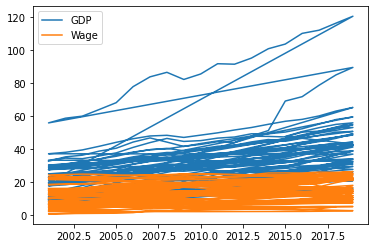

In [9]:
plot.plot(combined_df['Year'], combined_df['GDP'], combined_df['Year'], combined_df['Real Min. Wage'])
plot.legend(['GDP', 'Wage'])

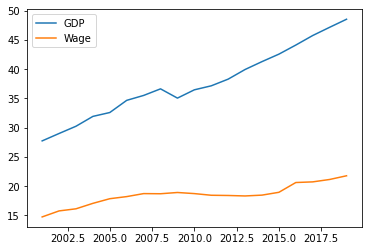

In [10]:
# Trial Plot of USA
def plot_country(country: str):
    plot_df = get_country_data(combined_df, country)
    plot.plot(plot_df['Year'], plot_df['GDP'], plot_df['Year'], plot_df['Real Min. Wage'])
    plot.legend(['GDP', 'Wage'])
plot_country('GBR')

# Mean and Growth Rate

The resulting trial plot was far too cluttered. This revealed that there would be too many individual plots. Different metrics will therefore be compared. The average minimum wage for all OECD countries for each year will be plooted alongside the Average gdp for all OECD countries for each year. Secondly, the growth rates of gdp and minimum wage for each country, over the period 2001 - 2019, will be compared. 

## Calculating the Mean GDP and Mean Real Min. Wage Per year

In [11]:
combined_df[combined_df['Year'] == 2001].mean()

Year              2001.000000
Real Min. Wage      10.609397
GDP                 20.168350
dtype: float64

In [12]:
years = []
MeanMinWage =[]
MeanGDP = []
for year in range(2001, 2019):
    # Find mean for the year
    temp = combined_df[combined_df['Year'] == year].mean(skipna=True) # Missing values ignored
    years.append(year)
    MeanGDP.append(temp['GDP'])
    MeanMinWage.append(temp['Real Min. Wage'])
# Create dict to create data frame
Mean_Data = {'Year' : years , 'Mean GDP' : MeanGDP , 'Mean Min. Wage' : MeanMinWage}
# Create Pandas Data frame
mean_df = pd.DataFrame(Mean_Data)
mean_df.head()

,Year,Mean GDP,Mean Min. Wage
0,2001,20.168350,10.609397
1,2002,21.168173,10.812154
2,2003,21.894542,10.994967
3,2004,23.229010,11.263630
4,2005,24.501410,11.480728


## Trial Plot of Means

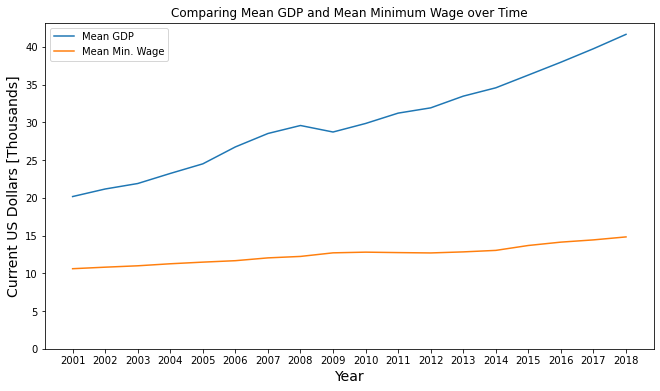

In [13]:
fig = plot.figure(figsize=(24, 6))

ax = fig.add_subplot(121)
ax.plot(mean_df['Year'], mean_df['Mean GDP'], mean_df['Year'], mean_df['Mean Min. Wage'])
ax.legend(['Mean GDP', 'Mean Min. Wage'])
ax.set_ylim(0)
ax.xaxis.set_ticks(ticks=(mean_df['Year']))
plot.xlabel("Year", fontsize=14)
plot.ylabel("Current US Dollars [Thousands]", fontsize=14)
ax.set_title("Comparing Mean GDP and Mean Minimum Wage over Time")
plot.show()

## Comparing the Growth in Average GDP to the Growth in Average Real Minimum Wage

In [14]:
temp2018 = mean_df[mean_df['Year'] == 2018]
temp2001 = mean_df[mean_df['Year'] == 2001]
gdp_growth = (temp2018['Mean GDP'].item() - temp2001['Mean GDP'].item()) / temp2001['Mean GDP'].item()
MinWage_growth = (temp2018['Mean Min. Wage'].item() - temp2001['Mean Min. Wage'].item()) / temp2001['Mean Min. Wage'].item()
print("Percentage Growth in GDP: \t\t\t {:.2f}".format(gdp_growth * 100))
print("Percentage Growth in Real Min. Wage: \t\t {:.2f}".format(MinWage_growth * 100))
print("GDP grew at a rate {:.2f} times the real minimum wage growth rate on average." .format(gdp_growth/MinWage_growth) )

Percentage Growth in GDP: 			 106.53
Percentage Growth in Real Min. Wage: 		 39.71
GDP grew at a rate 2.68 times the real minimum wage growth rate on average.


As can be seen above, while GDP increased by 106.53%, Real minimum wage only increased by 39.71%.

## Comparing Mean Real Minimum Wage as a percentage of GDP per Capita in 2001 and 2018

In [15]:
temp2010 = mean_df[mean_df['Year'] == 2010]
percentage2001 = (temp2001['Mean Min. Wage'].item() / temp2001['Mean GDP'].item() ) * 100
percentage2010 = (temp2010['Mean Min. Wage'].item() / temp2010['Mean GDP'].item() ) * 100
percentage2018 = (temp2018['Mean Min. Wage'].item() / temp2018['Mean GDP'].item() ) * 100
print("Average real minimum wage was {:.2f}% in 2001" .format(percentage2001))
print("Average real minimum wage was {:.2f}% in 2010" .format(percentage2010))
print("Average real minimum wage was {:.2f}% in 2018" .format(percentage2018))

Average real minimum wage was 52.60% in 2001
Average real minimum wage was 42.89% in 2010
Average real minimum wage was 35.58% in 2018


In 2001, Real Minimum wage was approximately 52.6% of the GDP per capita, by 2010 this had fallen to 42.89% and by 2018 only 35.58%. Real minimum wage is becoming less and less of a proportion of the GDP per capita, what is sold as equal among everyone.

## Finding Growth Rate 2001 - 2018

Growth rate is calculated simply for each country as: (GDP(2018) - GDP(2001)) / (GDP(2001)

In [19]:
# Create empty arrays to append values to
countries = []
gdp_growth = []
min_wage_growth = []
for country in oecd_countryCodes:
    # Isolate by country
    temp = combined_df[combined_df['Country Code'] == country]
    countries.append(temp['Country'])
    # isolate data for 2001
    temp2001 = temp[temp['Year'] == 2001]
    # isolate data for 2019
    temp2018 = temp[temp['Year'] == 2018]  
    # Find growth rate of GDP - If value is missing append 0.00 instead
    try:
        gdp_calc = (temp2018['GDP'].item() - temp2001['GDP'].item()) / temp2001['GDP'].item()
        gdp_growth.append(gdp_calc * 100) # Mulitply by 100%
    except ValueError:
        gdp_growth.append(0.00)
    # Find growth of Real Min. Wage - If value is missing append 0.00 instead
    try:
        min_wage_calc = ((temp2018['Real Min. Wage'].item()) - (temp2001['Real Min. Wage'].item())) / (temp2001['Real Min. Wage'].item())
        min_wage_growth.append(min_wage_calc * 100) # Multiply by 100%
    except ValueError:
        min_wage_growth.append(0.00)
# Create dict. to turn into DataFrame
data = {'Country Code' : oecd_countryCodes , 'Country' : oecd_countries , 'GDP Growth %' : gdp_growth , 'Real Min. Wage Growth %' : min_wage_growth}
# Creating data frame
growth_df = pd.DataFrame(data)
growth_df.drop(labels = [25], inplace = True) # Drop Germany - Only data availiable is 2015 - 2019
growth_df.head()

,Country Code,Country,GDP Growth %,Real Min. Wage Growth %
0,IRL,Ireland,160.973255,28.586901
1,LUX,Luxembourg,108.548865,14.417049
2,PRT,Portugal,78.831553,29.025113
3,USA,United States,69.927758,-0.732049
4,EST,Estonia,253.720066,187.706964


Text(0, 0.5, '% Growth')

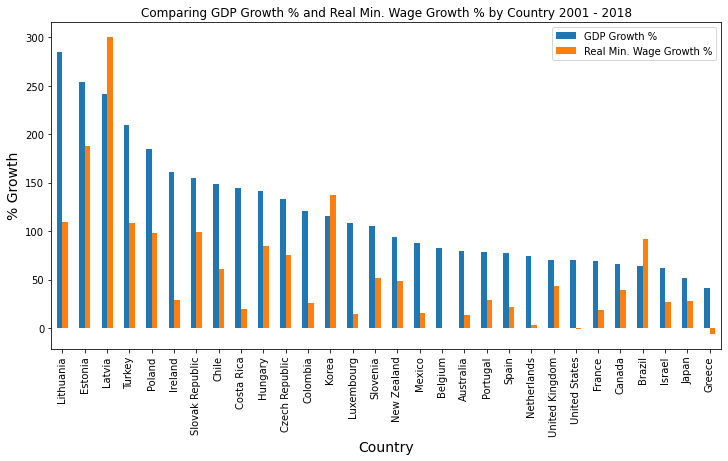

In [20]:
# Drop Russia for graph - anomlay with min mum wage growth of 800%
growth_df.drop(labels = [27], inplace = True) 
# sort from highest to lowest in terms of GDP
growth_df.sort_values(by='GDP Growth %', inplace=True, ascending=False)
plot = growth_df.plot.bar(x = 'Country', rot=0, figsize = (12,6))
plot.tick_params(axis='x', labelrotation = 90)
plot.set_title('Comparing GDP Growth % and Real Min. Wage Growth % by Country 2001 - 2018')
plot.set_xlabel('Country', fontsize=14)
plot.set_ylabel('% Growth', fontsize=14)

In [18]:
# Pearson's Correlation Coefficient and Spearman's Rank Correlation
pearson = growth_df['GDP Growth %'].corr(growth_df['Real Min. Wage Growth %'])
spearman = growth_df['GDP Growth %'].corr(growth_df['Real Min. Wage Growth %'], method = 'spearman')

print('Correlation results between GDP Value and Cost of Living Index:')
print("Pearson's Correlation Coefficient:\t {:.3f}" .format(pearson))
print("Spearman's Rank Correlation:\t\t {:.3f}" .format(spearman))

Correlation results between GDP Value and Cost of Living Index:
Pearson's Correlation Coefficient:	 0.736
Spearman's Rank Correlation:		 0.632
